In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from scipy.stats import linregress

class Star:
    
    
    def __init__(self, period, mass, group):
        self.period = period
        self.mass = mass
        self.group = group
#         self.predicted_period 
        

def get_data(location):
    """
    Takes string as input and returns a list of Star objects
    """
    data_frame = pd.read_csv(location, encoding = "utf-8", delimiter = "\t", comment = "#")

    mass = data_frame.M.tolist()
    period = data_frame.Per.tolist()
    
    return [Star(period, mass, 0) for mass, period in zip(mass,period)]


def calculate_line(m,x,c):
    return np.add(np.dot(m,x), c)


def calculate_bestfit(star_list):
    """
    Takes list of Star object and returns a list of values for the best fit line
    """
    for star in star_list:
        mass = [star.mass for star in star_list]
        period = [star.period for star in star_list]
        
    slope, intercept = linregress(mass,period)[:2]
    return calculate_line(slope, mass,intercept)


def partition(predicate, collection):
    """
    Split the collection into two sets, one containing those items for which
    the predicate evaluates to True, and the other for which they are False.
    """
    if isinstance(collection, list):
        positives, negatives = [], []
        for item in collection:
            if predicate(item):
                positives.append(item)
            else:
                negatives.append(item)
    elif isinstance(collection, set):
        positives, negatives = set(), set()
        for item in collection:
            if predicate(item):
                positives.add(item)
            else:
                negatives.add(item)
    elif isinstance(collection, dict):
        positives, negatives = {}, {}
        for k, v in collection.items():
            if predicate(v):
                positives[k] = v
            else:
                negatives[k] = v
    else:
        return collection, None if predicate(collection) else None, collection
    return positives, negatives


def fit_stars(star_list):
    for star in star_list:
        mass = [star.mass for star in star_list]
        period = [star.period for star in star_list]
        
    slope, intercept = linregress(mass,period)[:2]
    if star_list[0].group == 0:
        slope = 0
    predicted_period = calculate_line(slope, mass, intercept)
    
        

    
    
    


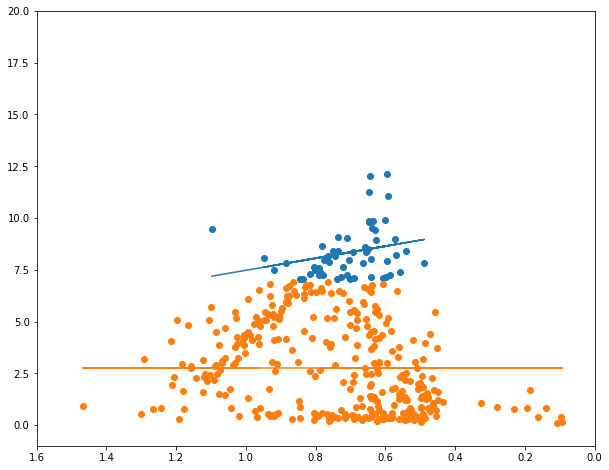

In [35]:
# path = "d:data\Pleiades_Hartman.csv"
path = "/home/edoodson/Documents/spin_down/data/Pleiades_Hartman.csv"


stars = get_data(path)

#for loop that assigns the values, above this random line, to group 1
for datum in stars:
    if datum.period >= calculate_line(0, datum.mass, 7):
        datum.group = 1

#splits the stars into two lists, with fast and slow rotators
slow_stars, fast_stars = partition( lambda x: x.group == 1, stars)

figure_1, ax1 = plt.subplots(1, figsize= (10,8))
ax1.invert_xaxis()
ax1.set(xlim = (1.6,0), ylim = (-1,20))             


slow_predicted= calculate_bestfit(slow_stars)
fast_predicted = [np.sum([star.period for star in fast_stars])/len(fast_stars) for _ in range(len(fast_stars))]

ax1.scatter([datum.mass for datum in slow_stars],[datum.period for datum in slow_stars])
ax1.plot([datum.mass for datum in slow_stars], slow_predicted)

ax1.scatter([datum.mass for datum in fast_stars],[datum.period for datum in fast_stars])
ax1.plot([datum.mass for datum in fast_stars], fast_predicted)

